# Πεπερασμένο σφαιρικό πηγάδι

Θα προσπαθήσουμε να λύσουμε την εξίσωση Schrodinger σε 3 διαστάσεις για σφαιρικά συμμετρικά δυναμικά, $ V (\vec{r}) = V (r) $, χρησιμοποιώντας σφαιρικές συντεταγμένες και αναζητώντας μια διαχωρίσιμη λύση. (Zettili 6.3.1, 6.3.3)

Tο γωνιακό τμήμα της λύσης δεν εξαρτάται από τις λεπτομέρειες των λύσεων και δίνεται από μία από τις *σφαιρικές αρμονικές*.  Το πραγματικό πρόβλημα είναι να λύσουμε την *ακτινική εξίσωση*, η οποία όταν αλλάζουμε μεταβλητές σε $u(r) =rR(r)$ δίνεται από:
$$-\frac{\hbar^2}{2m} \frac{d^2u}{dr^2}+\left[ V(r)+\frac{\hbar^2}{2m}\frac{l(l+1)}{r^2}\right]u=Eu$$ (Zettili  6.55)

Όπου $k=\sqrt{(E-V)/2m}/ \hbar$. Η γενική λύση όταν V(R)=V είναι σταθερή, ειναι της μορφής (Zetilli 6.65):
$$ u(r)=Arj_l(kr)+Brn_l(kr)$$
όπου $ j_l (x) $ είναι η σφαιρική συνάρτηση Bessel (του πρώτου είδους) της βαθμού $l$ και $n_l(x)$ είναι η σφαιρική συνάρτηση Neumann (ή η συνάρτηση Bessel δευτέρου τύπου) βαθμού $l$. Για ($ E <V $), πρέπει να χρησιμοποιήσουμε συναρτήσεις Hankel, οι οποίες είναι απλώς γραμμικοί συνδυασμοί των συναρτήσεων Bessel και Neumann. Δείτε την πρώτη αναφορά για περισσότερα σχετικά με τις συναρτήσεις Hankel.

### Αναφορές
Περισσότερα για την επιλογή των σωστών ειδικών συναρτήσεων για κάθε περιοχή: 6.3.3 Zettili

Πώς να πάρετε τις συναρτήσεις Bessel, Hankel, κλπ. https://docs.scipy.org/doc/scipy/reference/special.html

Πώς να χρησιμοποιήσετε το Brentq από το Scipy: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.brentq.html

### Πεπερασμένο σφαιρικό πηγάδι
Σε αυτό το notebook πρόκειται να βρείτε τις δεσμευμένες λύσεις κατάστασης στο πεπερασμένο σφαιρικό πηγάδι για τυχαίο $L$.  Το δυναμικό δίνεται από $V(r) =-|V| $ για $ r <= A $ και $ V(r) = 0 $ for $ r > a $.  Η εφαρμογή των οριακών συνθηκών κυματομορφής στο $r=a$ θα οδηγήσει σε μια υπερβατική εξίσωση, την οποία πρέπει να λύσουμε αριθμητικά.

Θα χρησιμοποιήσουμε τις ακόλουθες παραμέτρους:
$$ \hbar = m = 1 $$
$$ a = 2 $$
$$ V = -10 $$

#### Ερώτηση 1
Το πρώτο βήμα είναι να εξαχθεί η υπερβατική εξίσωση που προκύπτει από τις οριακές συνθήκες για το πεπερασμένο σφαιρικό πηγάδι. Δίνεται από τη σχέση Zettili 6.82:

$$ k_1\frac{j_l^\prime(z=k_1a)}{j_l(z=k_1a)}=ik_2\frac{h_l^\prime(z=k_2a)}{h_l(z=k_2a)}$$
$$k_1=\sqrt{2m(E-V)}/\hbar$$
$$k_2=\sqrt{2m|E|}/\hbar$$

Ας ξεκινήσουμε. Πρώτα θα φορτώσουμε τις βιβλιοθήκες που θα χρειαστούμε.

In [1]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import scipy.special    # Περιέχει τις συναρτήσεις Bessel, Neumann και Hankel
import scipy.optimize   # Περιέχει τον brentq, τον αλγόριθμο εύρεσης ρίζας που θα χρησιμοποιήσουμε

In [2]:
hbar=1
m=1
a=2
V=-10

#### Ερώτηση 2

Κάντε το γράφημα  των $l = 0,1,2$ bessel συναρτήσεων (του πρώτου είδους) *και* των παράγωγων τους για $ x = 0 ... 10 $.

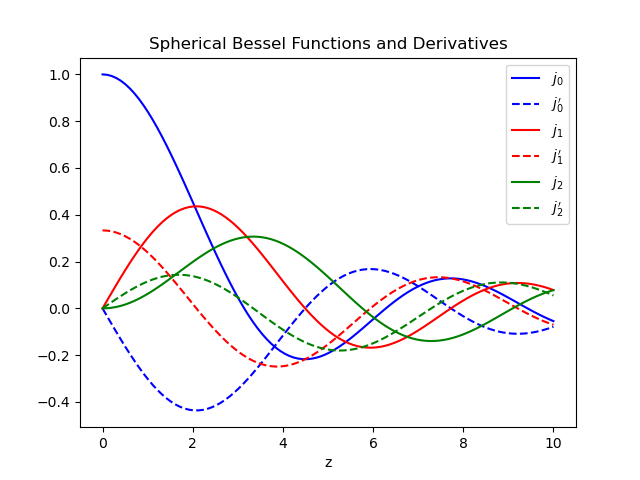

In [5]:
N=100
z = numpy.linspace(0, 10, N)
colors = ['blue','red','green']
for i in [0,1,2]:
    plt.plot(z, scipy.special.spherical_jn(i,z),color=colors[i], label=r'$j_'+str(i)+'$')
    plt.plot(z, scipy.special.spherical_jn(i,z,derivative=True),ls='--',color=colors[i], label=r'$j^\prime_'+str(i)+'$')
plt.xlabel("z")
plt.title("Spherical Bessel Functions and Derivatives")
plt.legend()
plt.show()

#### Ερώτηση 3
Η υπερβατική εξίσωση που προέκυψε είναι της μορφής:
$$f_l(Ε) = g_l(Ε)$$
Συνάρτηση της ενέργειας και στις δύο πλευρές, με $l$ ως παράμετρο. Οι ενέργειες, $E$, που ικανοποιούν αυτήν την εξίσωση (για τη δεδομένη γωνιακή ορμή $l$) είναι οι δεσμευμένες ενέργειακές καταστάσεις. Εναλλακτικά, κατασκευάζουμε την:
$$ Q_l(E) = f_l(E)- g_l(E) $$
Τώρα οι ενέργειες που αναζητούμε είναι οι ρίζες της   $ Q_l (Ε) = 0 $.

Γράψτε μια συνάρτηση, που ονομάζεται *boundary_function*, που παίρνει $ Ε $ και $ l $ ως ορίσματα και επιστρέφει την τιμή της $Q_l(Ε)$. 

Στη συνέχεια, φτιάξτε ένα γράφημα $ Q_{l = 0} (E) $ για $ E =-| V | ...0 $.  Έχει το $ Q_L $ έχει ένα φανταστικό κομμάτι;  Πόσες δεσμευμένες καταστάσεις προκύπτουν για $l = 0$, και ποιες είναι κατά προσέγγιση  οι ενέργειές τους;

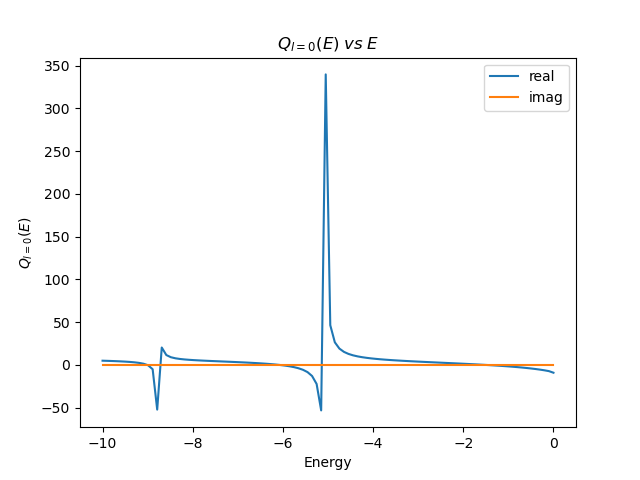

In [7]:
# Συμπληρώστε αυτές τις δύο συναρτήσεις
def k1(E):
    return numpy.sqrt(2*m*(E - V))/hbar

def k2(E):
    return numpy.sqrt(-2*m*E)/hbar

def hankel(l, z):
    z_safe = z + 1e-10  # Αποφυγή z=0
    return numpy.sqrt(numpy.pi/(2*z_safe))*scipy.special.h1vp(l+0.5,z_safe,0)
    
def hankel_deriv(l, z):
    z_safe = z + 1e-10  # Αποφυγή z=0
    return numpy.sqrt(numpy.pi/(2*z_safe))*scipy.special.h1vp(l+0.5,z_safe,1) - 0.5*(1./z_safe)*numpy.sqrt(numpy.pi/(2*z_safe))*scipy.special.h1vp(l+0.5,z_safe,0)
    
# Η Υπερβατική εξίσωση 
def boundary_function(E, l):
#    Βλ. Σκαναρισμένη Σελ. 1    
    left = k1(E)*scipy.special.spherical_jn(l, k1(E)*a, 1)/scipy.special.spherical_jn(l, k1(E)*a, 0)
    # right = 1J*K2 (E)*Hankel (L, 1J*K2 (E)*A, 1)/Hankel (L, 1J*K2 (E)*A, 0)
    right = 1j*k2(E)*hankel_deriv(l, 1j*k2(E)*a)/hankel(l, 1j*k2(E)*a)
    
    return (left-right).real



# Σχεδιάζει την υπερβατική εξίσωση που προκύπτει από τις οριακές συνθήκες

plt.figure()
energies = numpy.linspace(V, 0, 100)
fnc = boundary_function(energies, 0)

plt.plot(energies, fnc.real, label="real")
plt.plot(energies, fnc.imag, label="imag")
plt.xlabel('Energy')
plt.ylabel(r'$Q_{l=0}(E)$')
plt.title(r'$Q_{l=0}(E)\; vs\; E$')
plt.legend()
plt.show()

*Γράψτε την απάντησή σας εδώ*

$ Q_ {l = 0} $ δεν φαίνεται να έχει ένα φανταστικό κομμάτι και υπάρχουν τρεις μηδενικές διασταυρώσεις, υποδεικνύοντας ότι υπάρχουν τρεις δεσμευμένες καταστάσεις.  Παρουσιάζονται περίπου στο $ e = -9, -6, -1.4 $.

#### Ερώτηση 4
Θα έπρεπε να έχετε δει ότι η $Q_L(E)$ είναι μια πραγματική συνάρτηση, για να επιστρέψετε μόνο το πραγματικό μέρος. (Σημείωση: Πιθανώς θα δείτε ένα πολύ μικρό φανταστικό μέρος, αυτό οφείλεται σε αριθμητικό σφάλμα και είναι ο λόγος για τον οποίο πρέπει να επιστρέψουμε ρητά το πραγματικό μέρος.)

Μπορείτε να μάθετε τις ενέργειες από το γράφημα, αλλά θέλουμε να κάνουμε κάτι καλύτερο από αυτό.  Θα ξεκινήσουμε γράφοντας μια συνάρτηση που παίρνει μια σειρά από ενέργειες και θα επιστρέψει μια λίστα με ζεύγη ενεργειών, $(Ε-δΕ, Ε)$, μεταξύ των οποίων μηδενίζεται το $ Q_L (Ε) $ (ή ισοδύναμα μεταξύ των οποίων αλλάζει πρόσημο η $ Q_l (E)$.  Τα αποτελέσματα σας για $ l = 0 $ φαίνεται να συμφωνούν με την γραφική;

In [9]:

def acquire_zero_bounds(energy_range, l): 
    zeros_list=[]  # Μηδενική αρχική λίστα
    value = boundary_function(energy_range[0],l)  # Τιμή εκκίνησης της boundary_function
    
    for i in range(0, len(energy_range)-1):
        new_value = boundary_function(energy_range[i+1],l)
        if(numpy.sign(new_value)*numpy.sign(value) == -1 and abs(value) < 1):
            zeros_list.append((energy_range[i], energy_range[i+1]))
        value = new_value
    return zeros_list

# Σαρώνει τις ενέργειες με βήμα το dE, ξεκινώντας από τη χαμηλότερη δυνατή ενέργεια (V =-| V |) στην υψηλότερη (0)
dE = abs(V)/1000
energy_range = numpy.arange(V, 0, dE)

# Εύρεση λύσεων αυτού του κβαντικού αριθμού γωνιακής ορμής, l
l=0

energy_bounds = acquire_zero_bounds(energy_range, l)
print(energy_bounds)


[(-9.010000000000021, -9.000000000000021), (-6.080000000000084, -6.070000000000084), (-1.5000000000001812, -1.4900000000001814)]


#### Ερώτηση 5
Τώρα γνωρίζουμε τις σωστές ενέργειες σε ένα μικρό $ΔΕ$. Μπορούμε να χρησιμοποιήσουμε έναν από τους γνωστούς από το μάθημα αλγόριθμους εύρεσης ρίζας, που ονομάζεται *brentq*, για να βρούμε το μηδέν με μεγάλη ακρίβεια.

Χρησιμοποιήστε τη μέθοδο brentq της Scipy για να βρείτε τις (αριθμητικά) ακριβείς δεσμευμένες ενέργειες κατάστασης.

In [11]:
def acquire_energies(energy_bounds, l):
    energies = []
    for energy_bound in energy_bounds:
        energies.append( scipy.optimize.brentq(boundary_function,      # 1ο όρισμα: η συνάρτηση
                energy_bound[0],       # 2ο όρισμα: κάτω όριο
                energy_bound[1],       # 3ο όρισμα: πάνω όριο
                args=(l,)              # 4ο όρισμα: tuple με το l) ) # Ποια πρέπει να είναι τα ορίσματα;
                                              ))
    return energies

energies = acquire_energies(energy_bounds, l)
print(energies)

[-9.005423248438039, -6.071859642187186, -1.4912503282431986]


#### Ερώτηση 6
Τώρα που έχουμε τις σωστές ενέργειες, πρέπει να κατασκευάσουμε τις κυματομορφές.  Γράψτε μια συνάρτηση που λαμβάνει τις ενέργειες, μια λίστα ακτίνων (θέσεις) και την τιμή του $ L $ και επιστρέφει μια λίστα με τις κυματοσυναρτήσεις για τις πιθανές δεσμευμένες καταστάσεις.  Γράψτε επίσης μια συνάρτηση που κανονικοποιεί σωστά την κυματοσυνάρτηση.

In [13]:
dr=0.01
max_r = 6
space = numpy.arange(0, max_r, dr)
inner = space <= a
outer = space > a

# Κανονικοποιήστε το ακτινικό τμήμα της κυματομορφής - θυμηθείτε το r^2!
def normalize(psi, space, dr):
    norm = numpy.sum(numpy.abs(psi)**2 * space**2 * dr) # Αλλάξτε εδώ
    return psi / numpy.sqrt(norm)

def get_wavefunctions(space, energies, l):
    psis=[]
    for energy in energies:

        psi = numpy.zeros(len(space), complex)
        # Υπολογισμός της Υ
        A = hankel(l, 1j*k2(energy)*a) / scipy.special.spherical_jn(l, k1(energy)*a, 0)
    
        psi[inner] = A*scipy.special.spherical_jn(l, k1(energy)*space, 0)[inner]  # Δες Σκαναρισμένη Σελ. 2
        psi[outer] = hankel(l, 1j*k2(energy)*space)[outer]
        
        psis.append(normalize(psi,space,dr))
        
    return psis


#### Ερώτηση 7
Αυτός ο κώδικας θα κάνει μια γραφική παράσταση της κατανομής ακτινικής πιθανότητας, $ RPD $, για όλες τις δεσμευμένες καταστάσεις για $ l = 0 $. 
$$ RPD = | R|^2r^2 $$

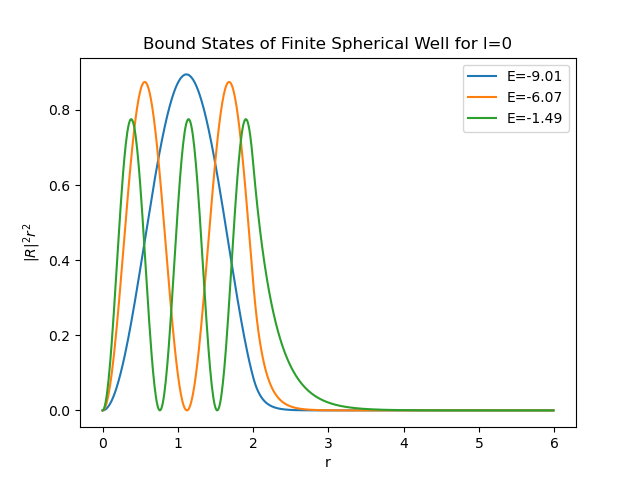

In [15]:
# Σχεδιάστε όλες τις bound state κυματοσυναρτήσεις
plt.figure()

wavefunctions = get_wavefunctions(space, energies, l)
for i in range(0,len(wavefunctions)):
    plt.plot(space, (numpy.conjugate(wavefunctions[i])*wavefunctions[i]*space*space).real, label="E="+str("%.2f" % energies[i]))
    
plt.xlabel('r')
plt.ylabel(r'$|R|^2r^2$')
plt.title('Bound States of Finite Spherical Well for l='+str(l))
plt.legend()
plt.show()

